In [1]:
import datetime
import math
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#matplotlib inline
import pyproj
import pymap3d as pm

from astropy.time import Time



In [2]:
## input data
data = pd.read_csv("data/dailycts/043a_all.cts", sep=" ")
#data["dates"]
data['Lat'], data['Lon'], data['Alt'] = pm.ecef2geodetic(data['X'], data['Y'], data['Z'], ell=None, deg=True)
#data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
#data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
#data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))
#data['jd'] = data['mjd'] + 2400000.5

#data['Date'] = Time(data['mjd'], format='mjd').datetime

data['Date']=pd.to_datetime(data['odate'], format='%Y-%m-%d')
data.sort_values(by=['Date'], ascending=True, inplace=True)

#P = pyproj.Proj(proj='utm', zone=34, ellps='WGS84', preserve_units=False)
#data['utmE'], data['utmN'] = P(data['Lon'], data['Lat'])

## set index
data = data.set_index(['Date'])
data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data
header= ['X','Y','Z',]
data.to_csv('data/test_p2.txt', columns=header)
#utmout = data[['utmE', 'utmN', 'Alt']].copy()
#
#utmout
#utmout.to_csv('Outputs/utm_ts.txt')

In [3]:
## convert to E N UP
meanX=data['X'].mean()
meanY=data['Y'].mean()
meanZ=data['Z'].mean()

ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
#mLon, mLat, mAlt = pyproj.transform(ecef, lla, meanX, meanY, meanZ, radians=False)
mLat, mLon, mAlt = pm.ecef2geodetic(meanX, meanY, meanZ,  ell=None, deg=True)



print(mLon, mLat, mAlt)


# mLon_r=math.radians(mLon)
# mLat_r=math.radians(mLat)
# print(meanLon, meanLat, meanAlt)

data['dX'] = data['X'] - meanX
data['dY'] = data['Y'] - meanY
data['dZ'] = data['Z'] - meanZ

## make rotational matrix
#R = [ 
#    [-math.sin(mLat_r)*math.cos(mLon_r), -math.sin(mLat_r)*math.sin(mLon_r), math.cos(mLat_r)],
#    [-math.sin(mLon_r), math.cos(mLon_r), 0],
#    [math.cos(mLat_r)*math.cos(mLon_r), math.cos(mLat_r)*math.sin(mLon_r), math.sin(mLat_r)]
#]


data['dE'], data['dN'], data['dU'] = pm.ecef2enu(data['X'], data['Y'], data['Z'], mLat, mLon, mAlt, ell=None, deg=True)
data['dN'] = data['dN']*1000.
data['dE'] = data['dE']*1000.
data['dU'] = data['dU']*1000.

#indexdN = data[ (data['dN'] >= 40) | (data['dN'] <=-40) ].index
#data.drop(indexdN , inplace=True)
header= ['X','Y','Z','dN', 'dE', 'dU']
#data.to_csv('Outputs/astr_enu.csv', columns=header)
data

22.76092773815913 37.9764401485617 65.92183137995302


,odate,otime,X,sX,Y,sY,Z,sZ,lat,slat,...,com,Lat,Lon,Alt,dX,dY,dZ,dE,dN,dU
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,2011-01-01,11:59:45,4.642072e+06,0.00276,1.947623e+06,0.00154,3.903424e+06,0.00242,37.976441,0.00104,...,ekxa21,37.976441,22.760927,65.930242,-0.021713,-0.066575,0.072313,-52.990004,85.171118,8.410724
2011-01-02,2011-01-02,11:59:45,4.642072e+06,0.00287,1.947623e+06,0.00160,3.903424e+06,0.00252,37.976441,0.00108,...,ekxa21,37.976441,22.760927,65.932032,-0.021153,-0.063795,0.073183,-50.643147,84.877329,10.200934
2011-01-03,2011-01-03,11:59:45,4.642072e+06,0.00317,1.947623e+06,0.00176,3.903424e+06,0.00277,37.976441,0.00117,...,ekxa21,37.976441,22.760927,65.927009,-0.023533,-0.066865,0.069353,-52.553286,83.939599,5.177964
2011-01-04,2011-01-04,11:59:45,4.642072e+06,0.00297,1.947623e+06,0.00168,3.903424e+06,0.00259,37.976441,0.00110,...,ekxa21,37.976441,22.760927,65.924054,-0.026653,-0.068575,0.069083,-52.923037,85.904209,2.222462
2011-01-05,2011-01-05,11:59:45,4.642072e+06,0.00281,1.947623e+06,0.00158,3.903424e+06,0.00245,37.976441,0.00105,...,ekxa21,37.976441,22.760927,65.925071,-0.024383,-0.067865,0.067703,-53.146560,83.359336,3.239841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-13,2023-05-13,11:59:45,4.642072e+06,0.00080,1.947624e+06,0.00038,3.903423e+06,0.00069,37.976440,0.00028,...,croasp,37.976440,22.760928,65.922803,0.020357,0.050745,-0.047617,38.917630,-61.166594,0.972085
2023-05-14,2023-05-14,11:59:45,4.642072e+06,0.00081,1.947624e+06,0.00039,3.903423e+06,0.00070,37.976440,0.00028,...,croasp,37.976440,22.760928,65.918588,0.018037,0.047315,-0.050027,36.652311,-60.933330,-3.243282
2023-05-15,2023-05-15,11:59:45,4.642072e+06,0.00084,1.947624e+06,0.00040,3.903423e+06,0.00073,37.976440,0.00028,...,croasp,37.976440,22.760928,65.921257,0.020607,0.050565,-0.050337,38.654925,-63.409674,-0.574808


[<AxesSubplot:xlabel='Date'> <AxesSubplot:xlabel='Date'>
 <AxesSubplot:xlabel='Date'>]


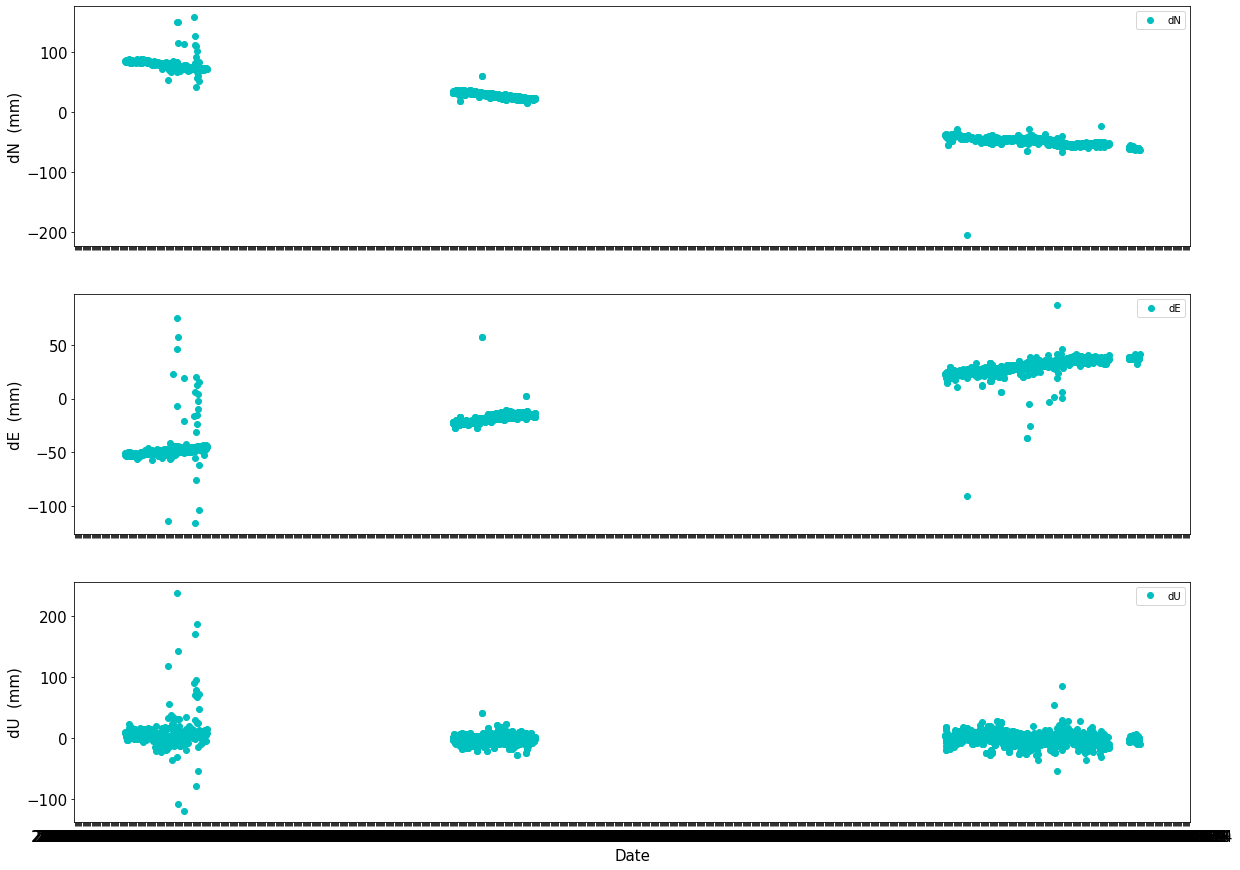

In [4]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)

plot_cols = ['dN', 'dE', 'dU' ]

data[plot_cols].plot(subplots=True, ax=axes, linestyle='', marker='o', color='c')

month_day_formatter = mdates.DateFormatter("%Y-%m-%d")

print(axes)

ylimits = [[-2,2], [-3,3], [-4,4] ]
for i, (ax, col) in enumerate(zip(axes, plot_cols)):
    # add axis labels
    ax.set_ylabel(col + '  (mm)',fontsize=15)
    ax.set_xlabel('Date', fontsize=15)
    ax.xaxis.set_major_formatter(month_day_formatter)
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=15)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    #ax.axvline(pd.Timestamp('2023-01-07 01:52:58'),color='r')
    #ax.set_ylim(ylimits[i])
## Save the figure
## =================================================================================
fig.savefig("Outputs/043a_all.jpg")
## =================================================================================

In [5]:
cust = "+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=59011 +y_0=-1001635 +ellps=airy +datum=OSGB36 +units=m +no_defs"
